# Exploratory Data Analysis - Terrorism
### *(Level - Intermediate)*

*   Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'
*   As a security/defense analyst, try to find out the hot zone of terrorism.
*   What all security issues and insights you can derive by EDA?
*   Dataset: https://bit.ly/2TK5Xn5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/globalterrorism.csv', encoding="ISO-8859-1", low_memory=False, index_col=0)
data.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## General data analysis

In [3]:
data.shape

(181691, 134)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181691 entries, 197000000001 to 201712310032
Columns: 134 entries, iyear to related
dtypes: float64(55), int64(21), object(58)
memory usage: 187.1+ MB


In [5]:
data.describe()

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

iyear              0
imonth             0
iday               0
approxdate    172452
extended           0
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 134, dtype: int64

In [7]:
data.isnull().sum()[data.isnull().sum() > 0]

approxdate    172452
resolution    179471
provstate        421
city             435
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64

## Preprocessing the missing values, removing unnecessary columns

In [8]:
threshold = len(data) * 0.8
threshold

145352.80000000002

In [9]:
columns_to_drop = data.columns[data.isnull().sum() > threshold]
columns_to_drop

Index(['approxdate', 'resolution', 'alternative', 'alternative_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt',
       'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3',
       'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3',
       'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3',
       'gsubname3', 'guncertain2', 'guncertain3', 'claimmode', 'claimmode_txt',
       'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3',
       'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt',
       'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt',
       'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt',
       'weapsubtype4', 'weapsubtype4_txt', 'nhostkid', 'nhostkidus', 'nhours',
       'ndays', 'divert', 'kidhijcountry', 'ransomamt', 'ransomamtus',
       'ransompaid', 'ransompaidus', 'rans

In [10]:
data.drop(columns_to_drop, axis=1, inplace=True)
data.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,...,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,0.0,0.0,NaN,NaN,NaN,PGIS,0,0,0,0
197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,...,1.0,1.0,NaN,NaN,NaN,PGIS,0,1,1,1
197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1


In [11]:
data.shape

(181691, 66)

In [12]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'guncertain1', 'individual', 'nperps', 'nperpcap',
       'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [13]:
columns_to_keep = [
    'eventid',
    'iyear',
    'imonth',
    'iday',
    'country_txt',
    'region_txt',
    'city',
    'latitude',
    'longitude',
    'suicide',
    'attacktype1_txt',
    'targtype1_txt',
    'gname',
    'weaptype1_txt',
    'nkill',
    'nwound',
    'motive'
]


data.drop(columns=[col for col in data.columns if col not in columns_to_keep], inplace=True)
data.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,suicide,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound
eventid,,,,,,,,,,,,,,,,
197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
197001000002,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
197001000003,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


## Checking for outliers

In [14]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'suicide', 'nkill',
       'nwound'],
      dtype='object')

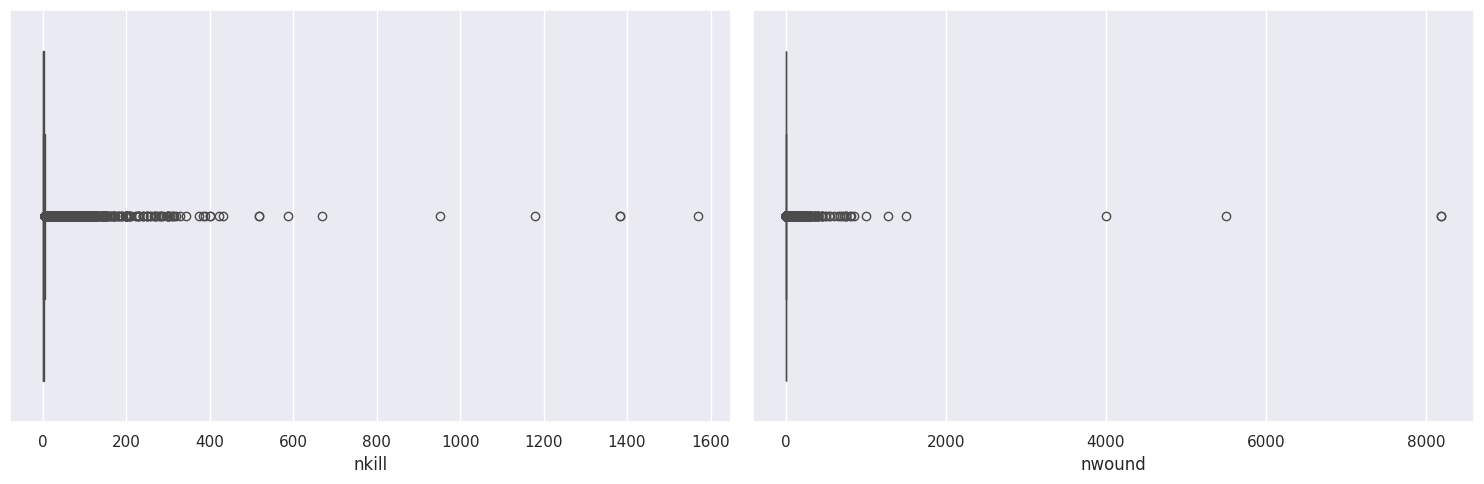

In [15]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(x=data['nkill'], ax=axes[0])
sns.boxplot(x=data['nwound'], ax=axes[1])
plt.tight_layout()
plt.show()

We won't remove the outliers in this case because terrorist attacks can indeed result in a large number of casualties, including fatalities and injuries. These outliers represent extreme events that, while uncommon, are still significant and relevant to our analysis. Removing them would distort the reality of the data and potentially undermine our understanding of the true impact of terrorist attacks.

## Analyze the distribution of attacks over time

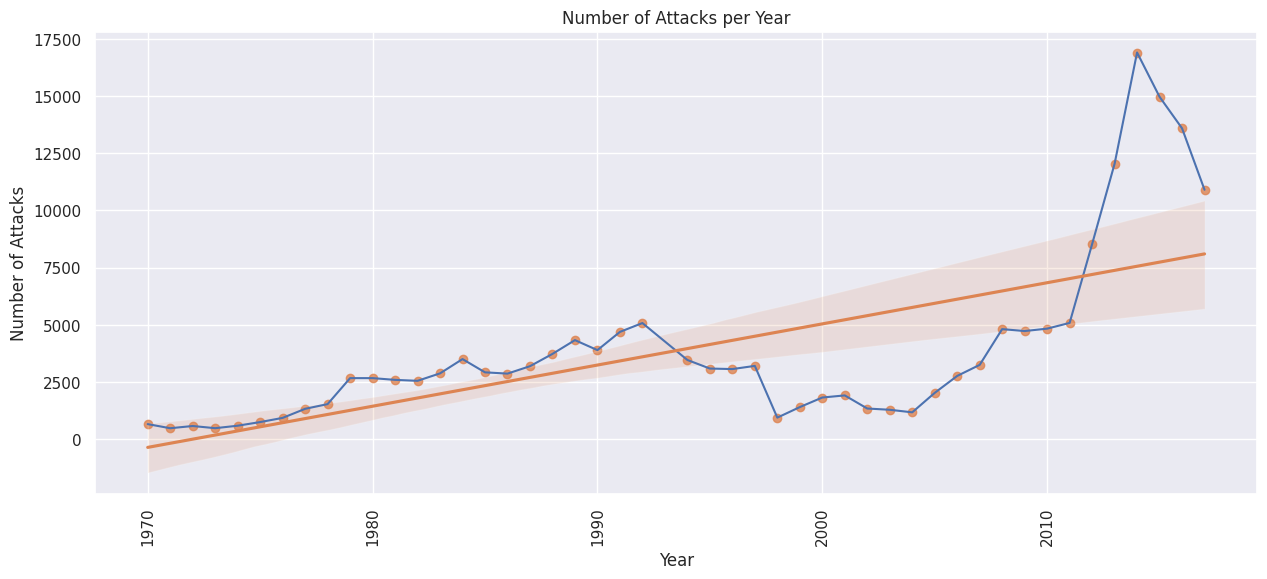

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.lineplot(x=data['iyear'].value_counts().index, y=data['iyear'].value_counts().values)
sns.regplot(x=data['iyear'].value_counts().index, y=data['iyear'].value_counts().values)
plt.title('Number of Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

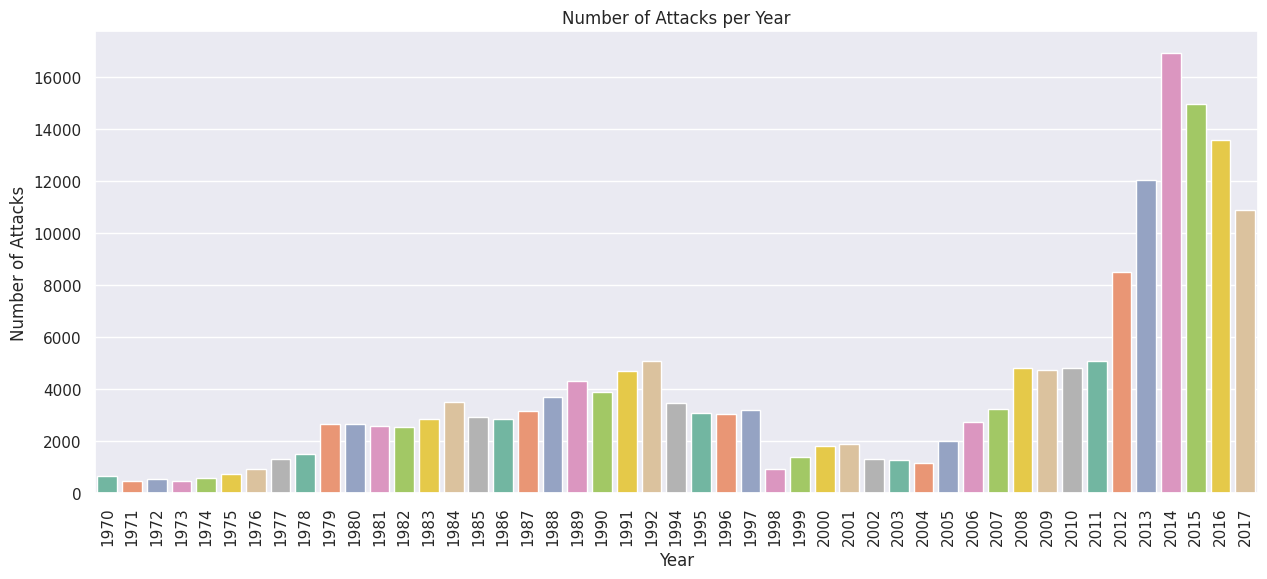

In [17]:
# Plot the number of attacks per year
plt.figure(figsize=(15, 6))
sns.countplot(x='iyear', data=data, palette=sns.color_palette("Set2"))
plt.title('Number of Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

The data illustrates the fluctuating trends in terrorist attacks over the years, with notable peaks observed in the mid-2010s followed by a gradual decline. While there were periodic spikes, indicating potential shifts in global conflict dynamics, the long-term perspective reveals varying levels of terrorism activity, with relatively low counts in the 1970s and 1980s compared to significant increases in later years. Further analysis is necessary to discern the underlying factors driving these trends, including geopolitical events, socio-economic conditions, and changes in terrorist tactics.

## Analyze the distribution of attacks by region

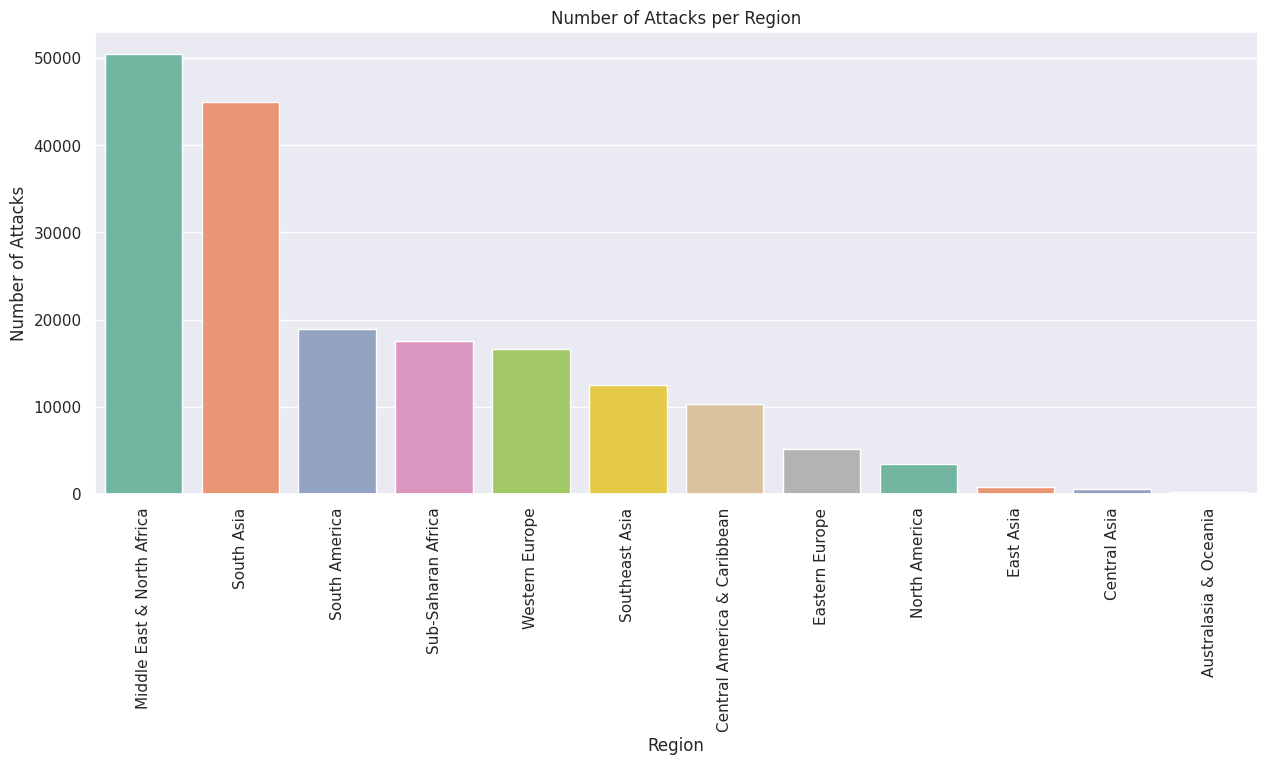

In [18]:
# Plot the number of attacks per region
plt.figure(figsize=(15, 6))
sns.countplot(x='region_txt', data=data, palette=sns.color_palette("Set2"), order=data['region_txt'].value_counts().index)
plt.title('Number of Attacks per Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

In [19]:
data['region_txt'].value_counts()

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64


The data shows the number of terrorist attacks by region, with the Middle East & North Africa recording the highest count at 50474 attacks, followed by South Asia with 44974 attacks. South America and Sub-Saharan Africa also experienced significant numbers of attacks, with 18978 and 17550 attacks respectively. Western Europe and Southeast Asia reported 16639 and 12485 attacks respectively. Central America & Caribbean, Eastern Europe, and North America recorded comparatively lower counts, with 10344, 5144, and 3456 attacks respectively. East Asia, Central Asia, and Australasia & Oceania had the lowest counts, with 802, 563, and 282 attacks respectively.

## Analyze the distribution of attacks by country

In [20]:
data.country_txt.nunique()

205

In [21]:
popular_countries = data.country_txt.value_counts()[:10]
popular_countries

country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

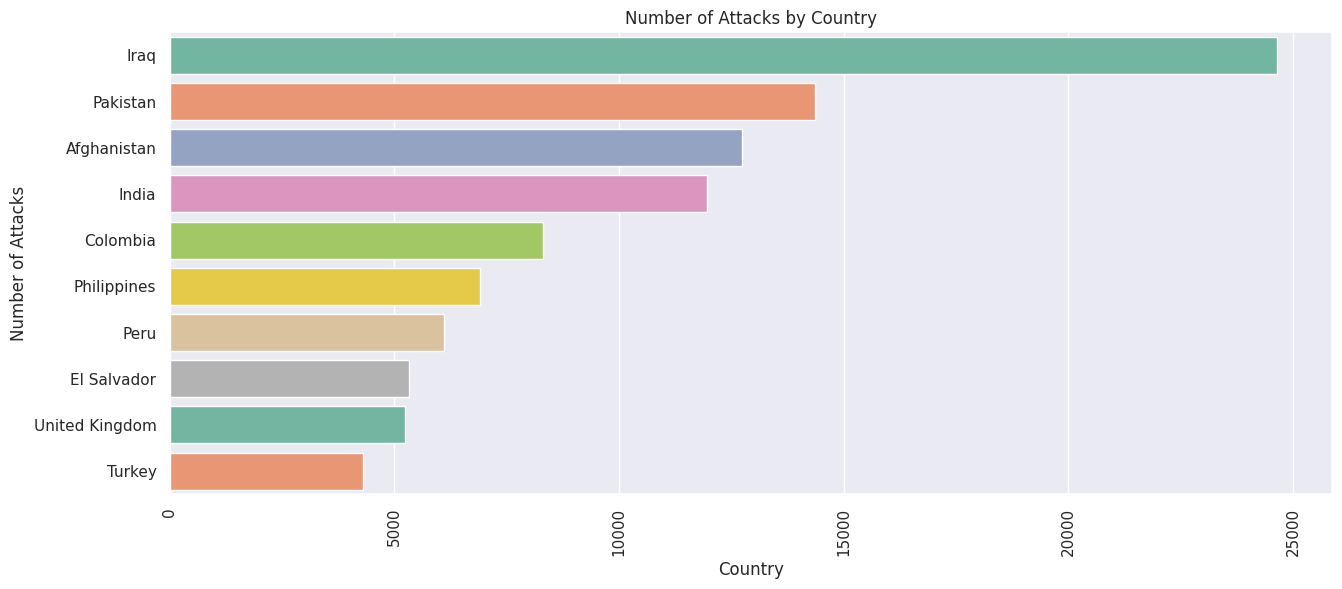

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.barplot(y=popular_countries.index, x=popular_countries.values, palette=sns.color_palette("Set2"), orient='h')
plt.title('Number of Attacks by Country')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

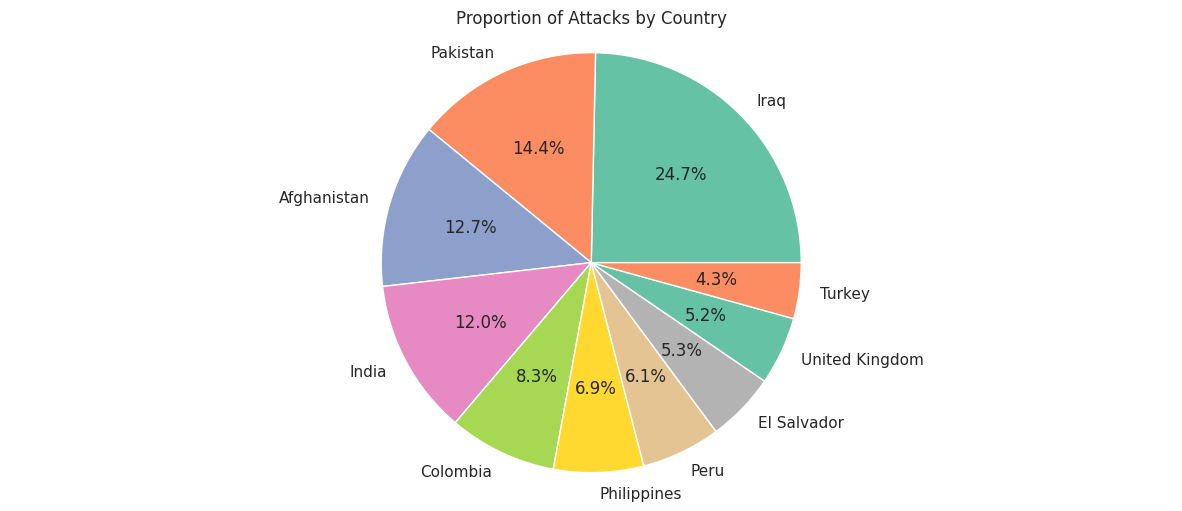

In [23]:
plt.figure(figsize=(15, 6))
plt.pie(popular_countries.values, labels=popular_countries.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Proportion of Attacks by Country')
plt.axis('equal')
plt.show()

The data highlights the countries most affected by terrorist attacks, with Iraq leading the list with 24636 attacks, followed by Pakistan with 14368 attacks and Afghanistan with 12731 attacks. India and Colombia also experienced significant numbers of attacks, with 11960 and 8306 attacks respectively. Other countries on the list include the Philippines, Peru, El Salvador, United Kingdom, and Turkey, each with varying but notable counts of terrorist attacks. These figures underscore the global impact of terrorism and the urgent need for effective counterterrorism measures and international cooperation to address this threat.

## Analysis of the number of killed

In [24]:
data.nkill.describe()

count    171378.000000
mean          2.403272
std          11.545741
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: nkill, dtype: float64

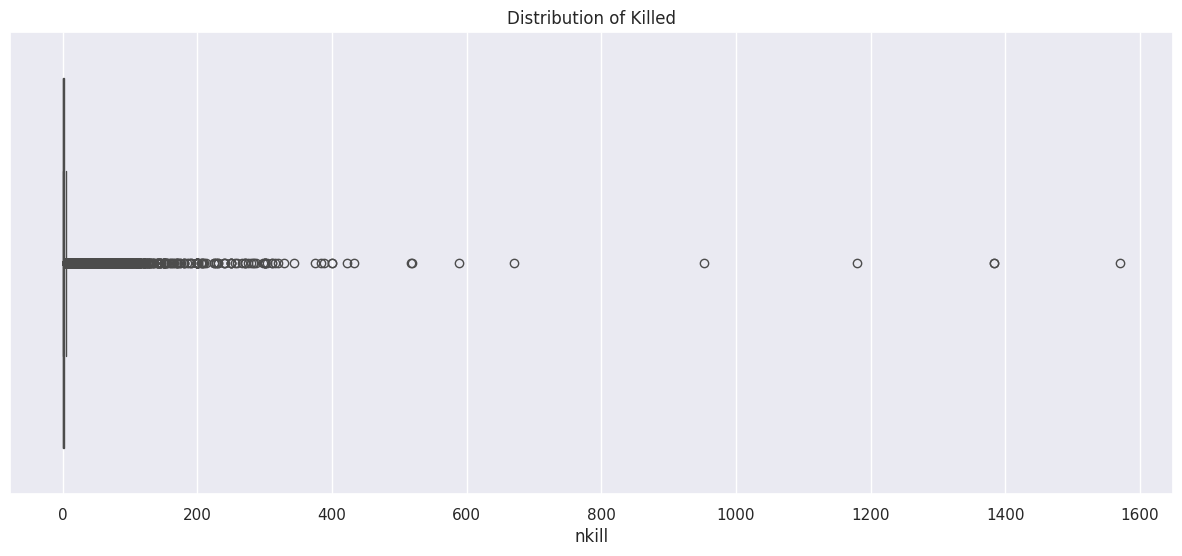

In [25]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=data['nkill'])
plt.title('Distribution of Killed')
plt.show()

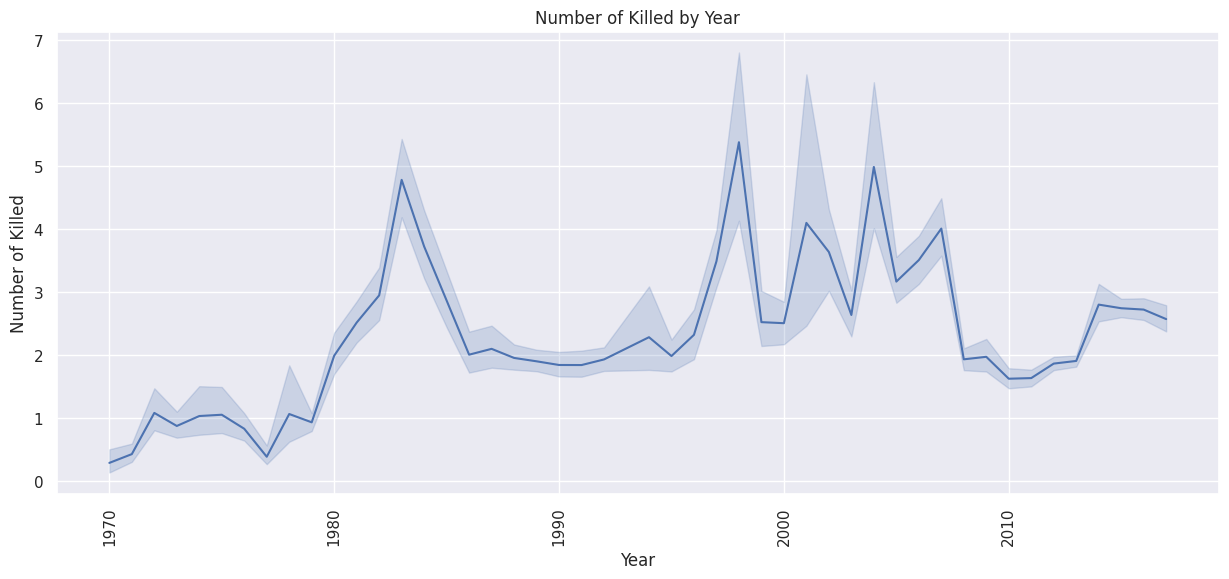

In [26]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=data['iyear'], y=data['nkill'])
plt.title('Number of Killed by Year')
plt.xlabel('Year')
plt.ylabel('Number of Killed')
plt.xticks(rotation=90)
plt.show()

The data on the average number of fatalities per year in terrorist attacks from 1970 to 2017 reveals a notable increasing trend over time, particularly since the early 1980s. While there are periodic fluctuations, certain years stand out with significantly higher average fatalities, indicating spikes in terrorist activity during those periods.

## Analysis of the type of attack and its connection with other changes

In [27]:
data.attacktype1_txt.value_counts()

attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

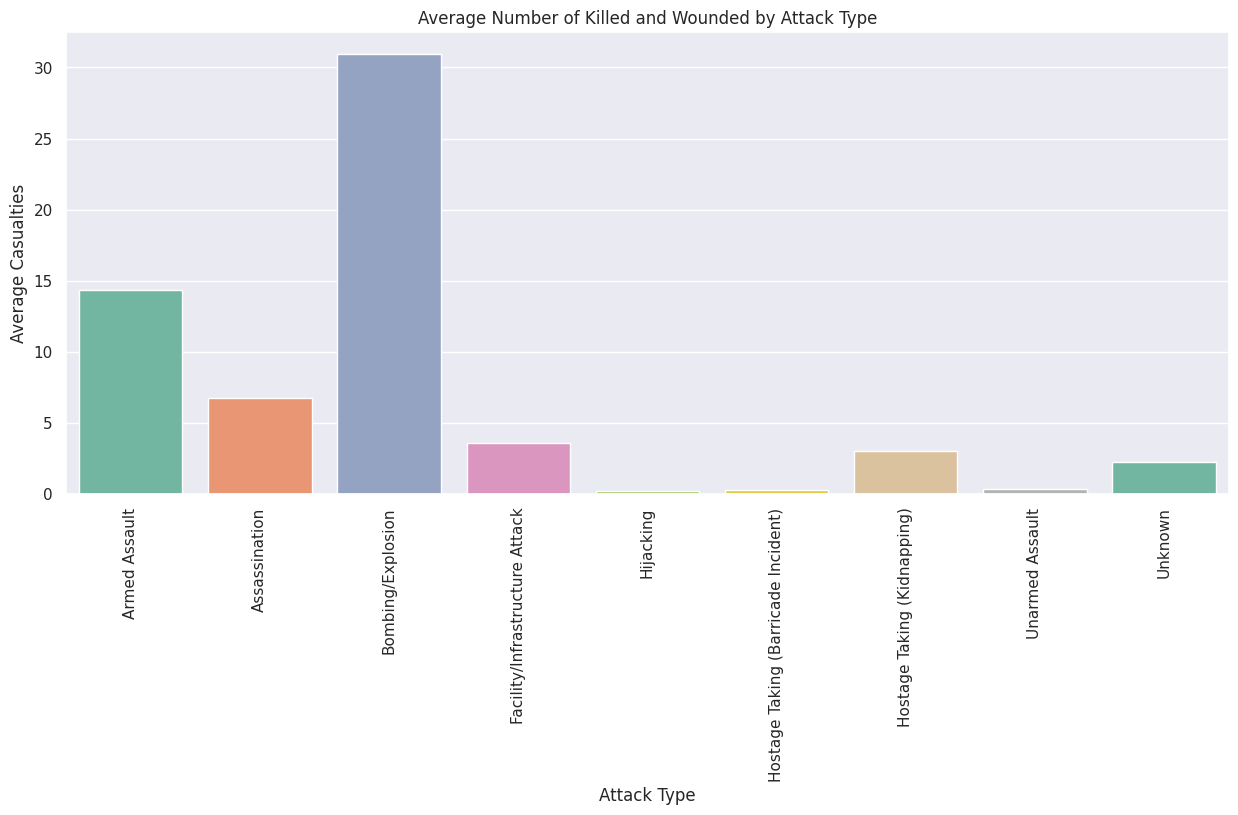

In [28]:
plt.figure(figsize=(15, 6))
attack_casualties = pd.crosstab(data['attacktype1_txt'], [data['nkill'], data['nwound']])
avg_casualties = attack_casualties.mean(axis=1)
sns.barplot(x=avg_casualties.index, y=avg_casualties.values, palette=sns.color_palette("Set2"))
plt.title('Average Number of Killed and Wounded by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Average Casualties')
plt.xticks(rotation=90)
plt.show()

From the analysis, it is evident that bombing/explosion incidents have the highest average casualties, followed by armed assaults and assassinations. Facility/infrastructure attacks, hostage takings, and kidnappings show relatively lower average casualties.

In [29]:
grouped_data = data[data.country_txt.isin(popular_countries.index)].groupby(['country_txt', 'attacktype1_txt']).size().unstack()
percentages = grouped_data.apply(lambda x: 100 * x / x.sum(), axis=1)
percentages

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
country_txt,,,,,,,,,
Afghanistan,22.598382,7.493520,49.053491,2.788469,0.125677,0.212081,7.941246,0.573404,9.213730
Colombia,23.741873,16.169034,37.659523,3.310860,0.397303,1.071515,12.737780,0.168553,4.743559
El Salvador,41.654135,8.439850,38.627820,3.646617,NaN,2.199248,2.894737,0.018797,2.518797
India,26.622074,10.275920,40.342809,8.327759,0.359532,0.367893,9.899666,1.195652,2.608696
Iraq,12.806462,5.224062,74.224712,0.625101,0.052768,0.097418,3.839909,0.024355,3.105212
Pakistan,26.858296,9.785635,52.985802,2.087973,0.132238,0.243597,5.728007,0.535913,1.642539
Peru,21.784777,16.437008,51.099081,3.658136,0.131234,1.213911,1.591207,0.065617,4.019029
Philippines,31.239143,15.909091,32.035321,6.543138,0.492183,0.767226,8.714534,0.057904,4.241459
Turkey,30.032619,10.181733,45.596459,6.500466,0.302889,0.302889,3.681267,0.232992,3.168686


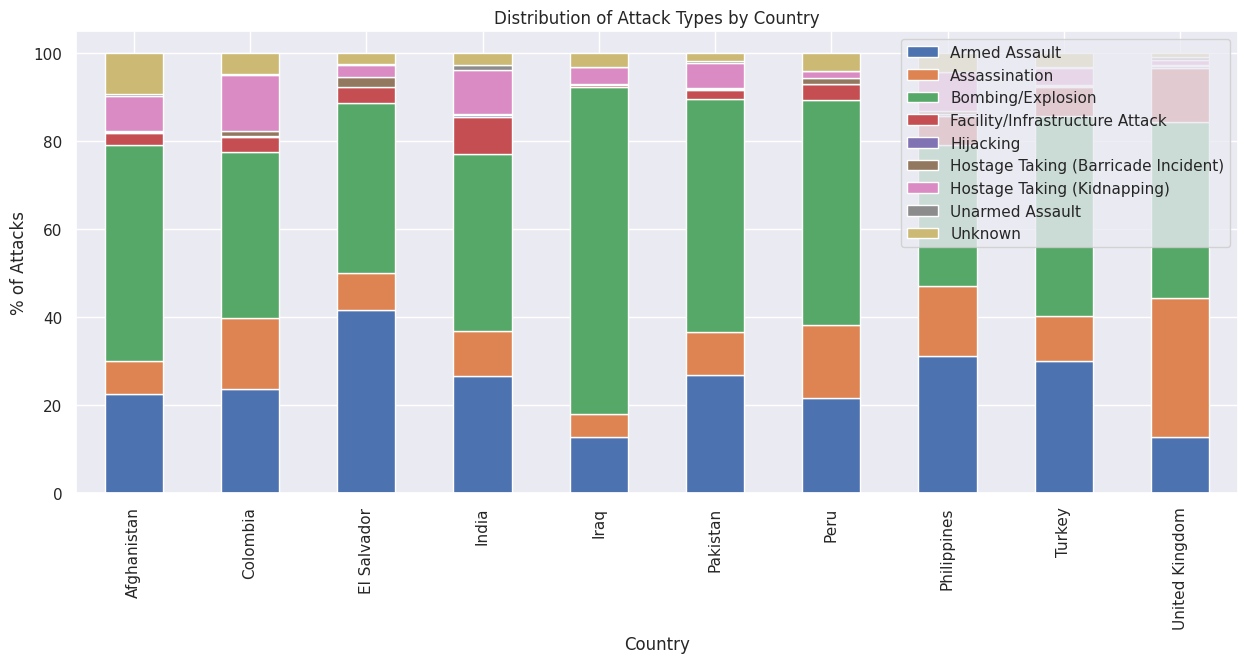

In [30]:
percentages.plot(kind='bar', stacked=True,  figsize=(15, 6))
plt.title('Distribution of Attack Types by Country')
plt.xlabel('Country')
plt.ylabel('% of Attacks')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

### Conclusion

1. **Most Prevalent Attack Types**: Bombing/explosions predominate in most countries, with particularly high percentages in Iraq, Pakistan, Peru.
2. **Regional Variations**: There are differences in the distribution of attack types across different regions. For example, armed assaults are particularly prevalent in El Salvador.
3. **Significance of Bombing/Explosion**: The high percentage of bombing/explosion incidents underscores their significant impact on various countries affected by terrorism. This type of attack tends to cause widespread casualties and destruction, making it a preferred method for many terrorist groups.
4. **Challenges in Counterterrorism**: The presence of unknown or unspecified attack types in certain countries highlights challenges in data collection and reporting, which could affect the accuracy of analyses and counterterrorism efforts.
5. **Targeted Countermeasures**: Understanding the distribution of attack types by country can inform targeted counterterrorism strategies tailored to address specific threats prevalent in each region.

Overall, these insights underscore the complex and multifaceted nature of terrorism, necessitating comprehensive and adaptable counterterrorism approaches to mitigate its impact effectively.


## Visualizing terrorism hotspots in different regions and countries

In [31]:
def visualize_hotspots(data, region):
    location_data = round(data[data.region_txt==region][['latitude', 'longitude', 'city']], 6)
    terrorism_counts = location_data.groupby(['latitude', 'longitude', 'city']).size().reset_index(name='terrorism_count')
    sorted_terrorism_counts = terrorism_counts.sort_values('terrorism_count', ascending=False)[:100]
    cities = sorted_terrorism_counts[:5].city
    location_data_cities = location_data[location_data.city.isin(cities)]
    plt.figure(figsize=(10, 8))
    plt.scatter(terrorism_counts['longitude'], terrorism_counts['latitude'],
                s=terrorism_counts['terrorism_count'], alpha=0.3)
    plt.scatter(sorted_terrorism_counts['longitude'], sorted_terrorism_counts['latitude'],
                s=sorted_terrorism_counts['terrorism_count']*0.2, c='red', alpha=0.3)
    for city in cities:
        city_data = location_data_cities[location_data_cities.city == city]
        plt.scatter(city_data['longitude'].mean(), city_data['latitude'].mean(),
                    c='#FF5733')
        plt.text(city_data['longitude'].mean(), city_data['latitude'].mean() + 1.5, city, ha='center', va='center', fontsize=8)
    plt.title(f'Terrorism Hotspots in {region}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

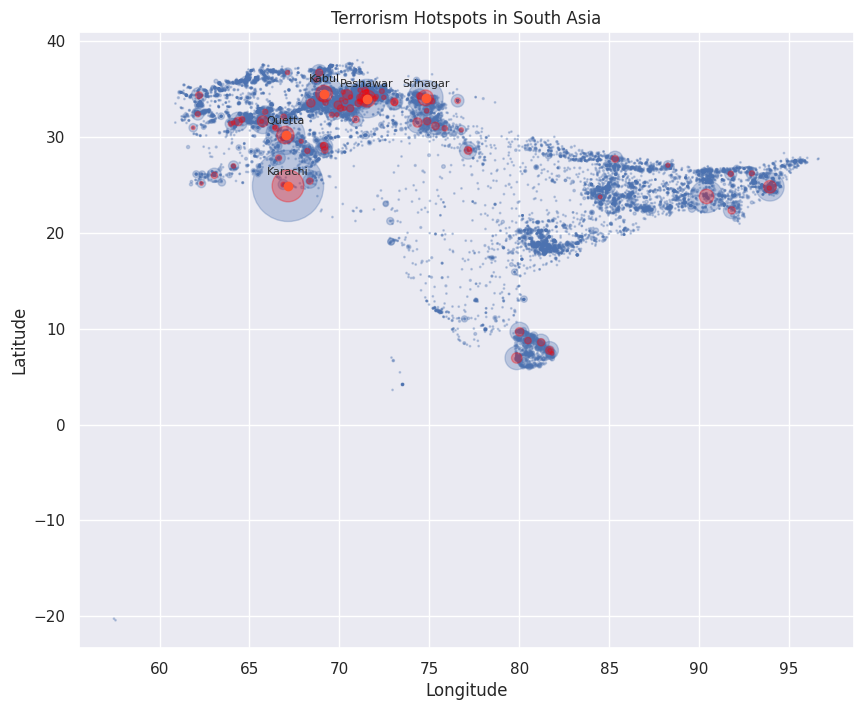

In [32]:
visualize_hotspots(data, 'South Asia')

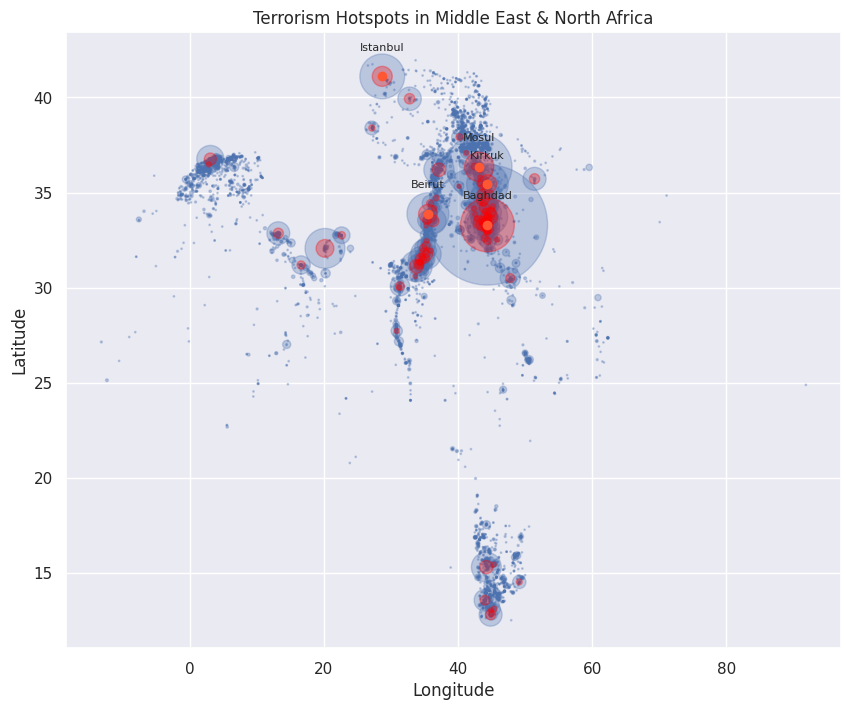

In [33]:
visualize_hotspots(data, 'Middle East & North Africa')

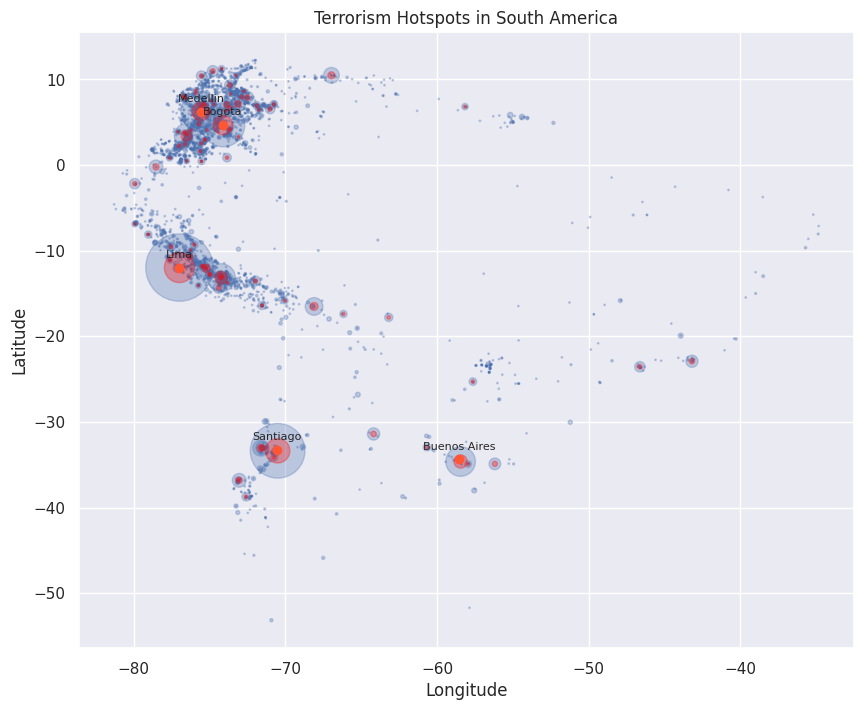

In [34]:
visualize_hotspots(data, 'South America')

## Analysis of the motive for terrorist attacks

In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
motive_text = ' '.join(data['motive'].dropna().tolist()).replace('Unknown', '')
tokens = word_tokenize(motive_text)
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
freq_dist = FreqDist(filtered_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


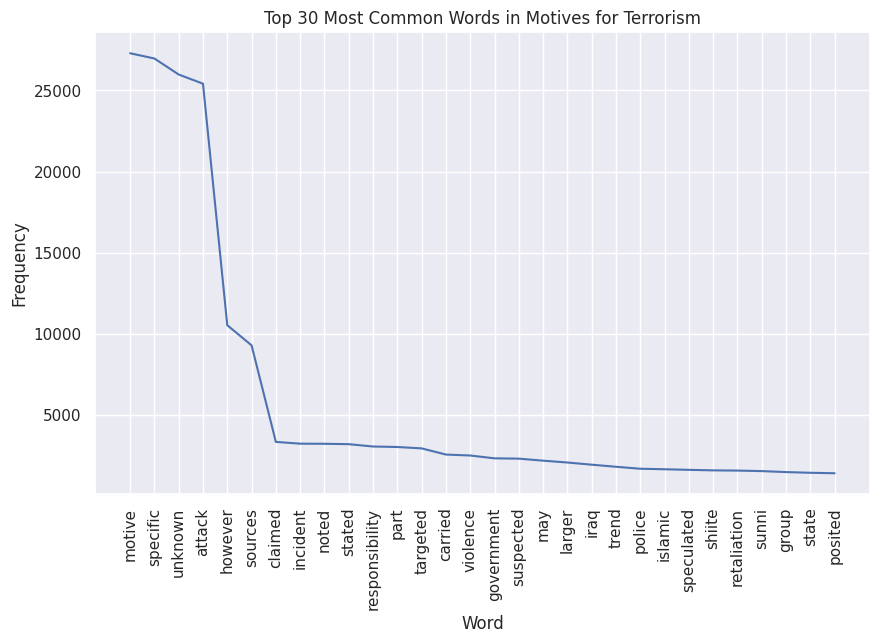

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=dict(freq_dist.most_common(30)).keys(), y=dict(freq_dist.most_common(30)).values())
plt.title('Top 30 Most Common Words in Motives for Terrorism')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Insights from Motives for Terrorism Analysis

Key Findings:
1. Uncertainty: The presence of words like "motive", "specific", and "unknown" suggests a lack of clarity or specific motive behind terrorist acts.
2. Claim of Responsibility: Words like "claimed", "stated", and "responsibility" indicate that someone or something has claimed responsibility for the terrorist act.
3. Political Motives: Words like "government", "violence", "suspected", "police", "Islamic", "Shiite", "Sunni", "group", and "state" suggest possible political motives and conflicts associated with terrorist acts.
4. Specific Incidents: Words such as "incident", "targeted", and "carried" may refer to specific events or objects that were the targets of terrorist attacks.
5. Trends and Speculations: The presence of words like "trend", "may", "larger", "speculated", and "posited" implies discussions about potential trends, broader implications, and speculations surrounding terrorist activities.

This analysis provides valuable insights into the language and discourse surrounding terrorist motives, highlighting the complexity and multifaceted nature of terrorism.

### Exploratory Data Analysis - Terrorism

#### Overview:
This notebook conducts exploratory data analysis (EDA) on the "Global Terrorism" dataset. The analysis aims to provide insights into patterns, trends, and characteristics of terrorist attacks worldwide.

#### Dataset:
The dataset contains information about terrorist incidents, including the date, location, type of attack, number of casualties, and perpetrator group.

#### Analysis Performed:
1. **General Data Analysis**:
   - Checked dataset dimensions, data types, and missing values.
   - Removed unnecessary columns with excessive missing values.

2. **Preprocessing**:
   - Dropped columns with more than 80% missing values.
   - Kept relevant columns for analysis.

3. **Outlier Detection**:
   - Examined distributions of casualties (killed and wounded) and decided not to remove outliers.

4. **Trend Analysis**:
   - Investigated the number of attacks per year to identify temporal trends in terrorism activity.

5. **Regional Analysis**:
   - Explored the distribution of attacks across different regions.

6. **Country-wise Analysis**:
   - Analyzed the countries most affected by terrorist attacks.

7. **Casualties Analysis**:
   - Examined the distribution of casualties by attack type.
   - Visualized the proportion of attack types by country.

8. **Hotspot Identification**:
   - Visualized terrorism hotspots in different regions and countries.

9. **Motives Analysis**:
   - Analyzed the motives behind terrorist attacks using textual data.
   - Identified common words associated with terrorist motives.

#### Insights:
- Temporal trends show fluctuations in terrorism activity over the years, with notable peaks observed in the mid-2010s.
- The Middle East & North Africa region experienced the highest number of terrorist attacks.
- Iraq, Pakistan, and Afghanistan are the countries most affected by terrorism.
- Bombing/explosion incidents result in the highest average casualties.
- Political motives and conflicts play a significant role in terrorism.
- Uncertainty and speculation surround terrorist motives.

#### Conclusion:
This EDA provides valuable insights into the global terrorism landscape, highlighting the need for comprehensive counterterrorism strategies and international cooperation to address this complex and multifaceted threat effectively.
